In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
train = pd.read_csv('expedia-personalized-sort/data/train.csv')

In [3]:
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance

In [5]:
train_df = train.drop(columns=['comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 
                            'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 
                            'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 
                            'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 
                            'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 
                            'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 
                            'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
                            'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff',
                            'gross_bookings_usd'])

train_df.dropna(axis=0, inplace=True)

train_df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,click_bool,booking_bool
16838,1148,2012-11-04 12:22:37,5,219,4.2,412.23,219,1497,4,4.0,...,0,2,0,1,0,-5.8288,5.48,0,0,0
16839,1148,2012-11-04 12:22:37,5,219,4.2,412.23,219,5002,5,4.5,...,0,2,0,1,0,-6.0284,4.92,0,0,0
16840,1148,2012-11-04 12:22:37,5,219,4.2,412.23,219,6439,5,4.5,...,0,2,0,1,0,-6.1870,5.76,0,0,0
16841,1148,2012-11-04 12:22:37,5,219,4.2,412.23,219,7880,4,4.5,...,0,2,0,1,0,-6.2437,5.72,0,0,0
16842,1148,2012-11-04 12:22:37,5,219,4.2,412.23,219,8962,4,4.0,...,0,2,0,1,0,-6.0487,6.07,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9843229,660631,2013-06-15 19:08:25,5,219,2.0,69.78,219,131978,4,3.5,...,3,1,0,1,0,-55.2460,266.72,0,0,0
9843230,660631,2013-06-15 19:08:25,5,219,2.0,69.78,219,134491,2,4.0,...,3,1,0,1,0,-61.2034,269.88,0,0,0
9843231,660631,2013-06-15 19:08:25,5,219,2.0,69.78,219,137926,3,4.0,...,3,1,0,1,0,-63.1319,270.71,0,0,0
9843232,660631,2013-06-15 19:08:25,5,219,2.0,69.78,219,138201,4,4.0,...,3,1,0,1,0,-60.4917,267.91,0,0,0


In [6]:
test = pd.read_csv('expedia-personalized-sort/data/test.csv')
test_df = test.drop(columns=['comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 
                            'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 
                            'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 
                            'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 
                            'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 
                            'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 
                            'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
                            'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'])

test_df.dropna(axis=0, inplace=True)
test_df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool
48590,4945,2013-06-28 11:40:32,16,31,4.0,91.26,31,5257,4,4.5,...,23591,7,16,2,1,1,0,-28.6659,145.38,0
48594,4945,2013-06-28 11:40:32,16,31,4.0,91.26,31,24555,3,3.0,...,23591,7,16,2,1,1,0,-17.4194,138.49,0
48597,4945,2013-06-28 11:40:32,16,31,4.0,91.26,31,32930,3,3.0,...,23591,7,16,2,1,1,0,-29.1049,138.53,0
48598,4945,2013-06-28 11:40:32,16,31,4.0,91.26,31,34572,4,3.0,...,23591,7,16,2,1,1,0,-28.0601,136.88,0
48600,4945,2013-06-28 11:40:32,16,31,4.0,91.26,31,42497,4,4.5,...,23591,7,16,2,1,1,0,-29.2965,131.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622476,665555,2013-01-05 08:22:42,14,100,2.0,71.80,219,14646,3,4.5,...,27787,1,12,2,0,1,1,-9.8997,977.69,0
6622477,665555,2013-01-05 08:22:42,14,100,2.0,71.80,219,18858,3,4.5,...,27787,1,12,2,0,1,1,-9.6456,979.09,0
6622478,665555,2013-01-05 08:22:42,14,100,2.0,71.80,219,60275,3,3.5,...,27787,1,12,2,0,1,1,-9.5568,977.87,0
6622479,665555,2013-01-05 08:22:42,14,100,2.0,71.80,219,86247,4,4.0,...,27787,1,12,2,0,1,1,-9.7887,979.37,0


In [7]:
train_df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool'],
      dtype='object')

In [8]:
test_df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool'],
      dtype='object')

Text(0.5, 1.0, 'Room price')

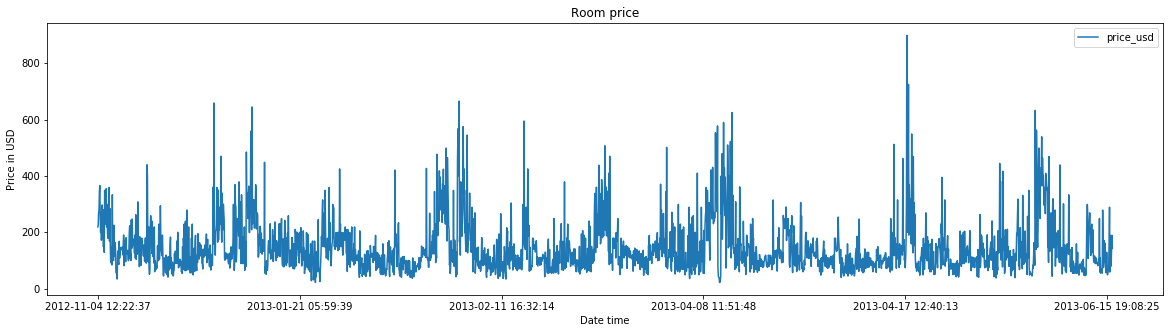

In [9]:
train_df.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Room price')

In [10]:
train_df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,click_bool,booking_bool
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,...,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,343927.313842,8.346460,196.830549,3.196408,176.296074,190.473747,67644.720366,3.134845,3.93755,0.706444,...,32.777645,1.891806,0.357597,1.063246,0.448687,-29.538278,1608.779733,0.089101,0.053302,0.048528
std,208879.954694,7.069358,50.761632,0.718438,125.029103,56.902164,40703.962530,0.989255,0.69553,0.455482,...,41.097308,0.658161,0.614042,0.278521,0.497459,21.228330,2196.882134,0.284946,0.224679,0.214922
min,1148.000000,5.000000,31.000000,1.500000,0.000000,4.000000,155.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,-138.731000,0.090000,0.000000,0.000000,0.000000
25%,123004.000000,5.000000,219.000000,2.580000,88.670000,219.000000,32219.750000,3.000000,3.50000,0.000000,...,3.000000,2.000000,0.000000,1.000000,0.000000,-36.861600,130.257500,0.000000,0.000000,0.000000
50%,322969.000000,5.000000,219.000000,3.130000,144.540000,219.000000,67177.500000,3.000000,4.00000,1.000000,...,15.000000,2.000000,0.000000,1.000000,0.000000,-23.486250,598.145000,0.000000,0.000000,0.000000
75%,539227.000000,5.000000,219.000000,3.670000,213.760000,219.000000,102376.000000,4.000000,4.50000,1.000000,...,48.000000,2.000000,1.000000,1.000000,1.000000,-15.432850,2124.195000,0.000000,0.000000,0.000000
max,660631.000000,32.000000,220.000000,5.000000,757.620000,221.000000,140816.000000,5.000000,5.00000,1.000000,...,233.000000,8.000000,3.000000,4.000000,1.000000,-3.210700,10466.510000,1.000000,1.000000,1.000000


In [11]:
data = train_df[['price_usd', 'srch_booking_window', 'srch_query_affinity_score']]
n_cluster = range(1, 15)

kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

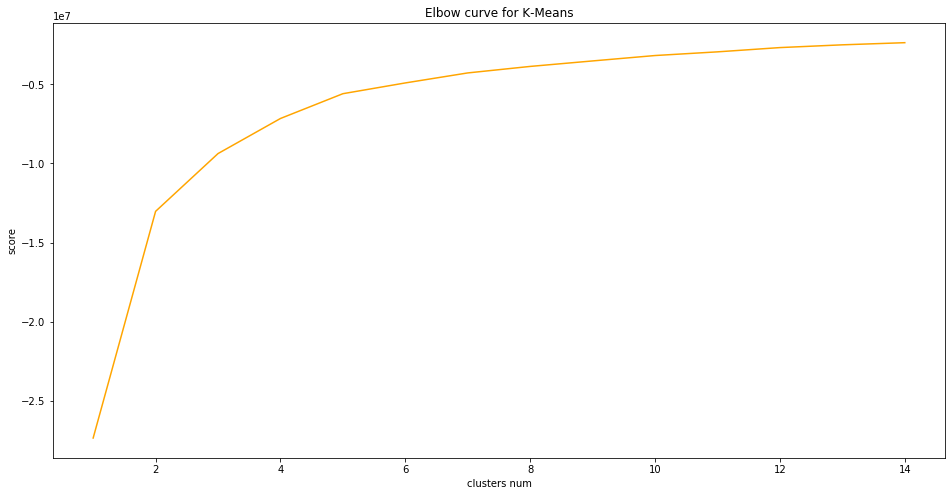

In [12]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(n_cluster, scores, color = 'orange')

plt.xlabel('clusters num')
plt.ylabel('score')
plt.title('Elbow curve for K-Means')
plt.show();

In [13]:
data_1 = test_df[['price_usd', 'srch_booking_window', 'srch_query_affinity_score']]

In [14]:
frames = [data, data_1]
final_data = pd.concat(frames)

In [15]:
km = KMeans(n_clusters = 15).fit(final_data)

In [17]:
X = final_data[['price_usd', 'srch_query_affinity_score', 'srch_booking_window']]
# X = X.reset_index(drop = True)

# km.predict(X)
# print(len(km.predict(X)))

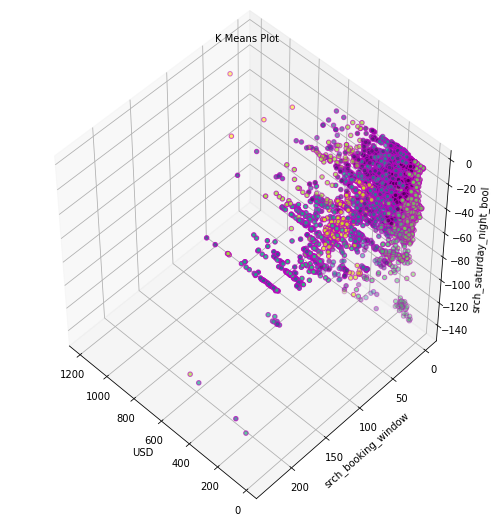

In [18]:

fig = plt.figure(1, figsize = (7, 7))

ax = Axes3D(fig, rect = [0, 0, 0.95, 1], 
            elev = 48, azim = 134)

ax.scatter(X.iloc[:, 0], 
           X.iloc[:, 2], 
           X.iloc[:, 1],
           c = km.labels_.astype(np.float), edgecolor = 'm')

#c = km.labels_.astype(np.float)
ax.set_xlabel('USD')
ax.set_ylabel('srch_booking_window')
ax.set_zlabel('srch_saturday_night_bool')

plt.title('K Means Plot', fontsize = 10);